<a href="https://colab.research.google.com/github/jesusjavieragreda/nubesPuntos/blob/main/nubePuntos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   nodo  numero de iteraciones  centralidad de grado  \
0     0                      6              0.015075   
1     1                      6              0.035176   
2     2                      7              0.040201   
3     3                      6              0.040201   
4     4                      6              0.025126   

   centralidad de interconexion  centralidad de cercania  excentricidad  
0                      0.008901                 0.015075              6  
1                      0.038952                 0.035176              6  
2                      0.044868                 0.040201              7  
3                      0.065350                 0.040201              6  
4                      0.028088                 0.025126              6  


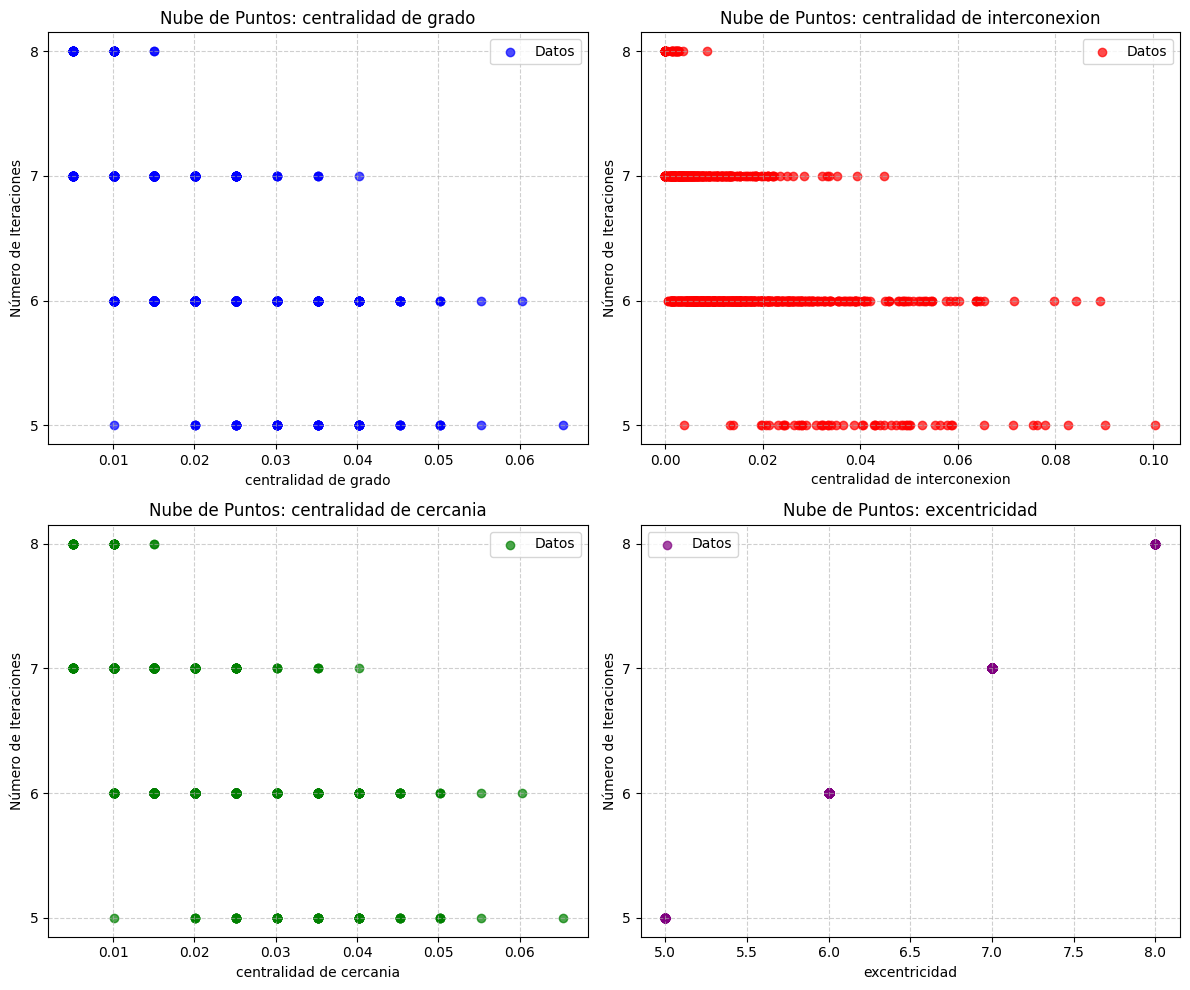

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator  # Para forzar valores enteros en el eje y

# Nombre del archivo Excel
archivo_excel = "Grafo_200nodos_0'03densidad.xlsx"

# Intentar cargar el archivo
try:
    df = pd.read_excel(archivo_excel)
except FileNotFoundError:
    print(f"Error: El archivo '{archivo_excel}' no se encontró.")
    exit()
except Exception as e:
    print(f"Error al leer el archivo: {e}")
    exit()

# Mostrar primeras filas para verificar nombres de columnas
print(df.head())

# Lista de propiedades y colores
propiedades = ["centralidad de grado", "centralidad de interconexion", "centralidad de cercania", "excentricidad"]
colores = ['blue', 'red', 'green', 'purple']

# Verificar que las columnas existen en el DataFrame
columnas_necesarias = propiedades + ["numero de iteraciones"]
for columna in columnas_necesarias:
    if columna not in df.columns:
        print(f"Error: La columna '{columna}' no existe en el archivo.")
        exit()

# Crear una figura con 4 subgráficos (2 filas, 2 columnas)
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Generar gráficos de dispersión con regresión lineal
for i, propiedad in enumerate(propiedades):
    ax = axes.flatten()[i]  # Obtener el eje correspondiente
    x = df[propiedad]
    y = df["numero de iteraciones"]

    # Crear scatter plot
    ax.scatter(x, y, color=colores[i], alpha=0.7, label="Datos")

    # Configurar que los valores del eje y sean enteros
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    # Configurar títulos y etiquetas
    ax.set_title(f"Nube de Puntos: {propiedad}")
    ax.set_xlabel(propiedad)
    ax.set_ylabel("Número de Iteraciones")
    ax.legend()
    ax.grid(True, linestyle='--', alpha=0.6)

# Ajustar espaciado
plt.tight_layout()

# Mostrar el gráfico
plt.show()
